# Final project 2

## Fashion Mnist classification notebook




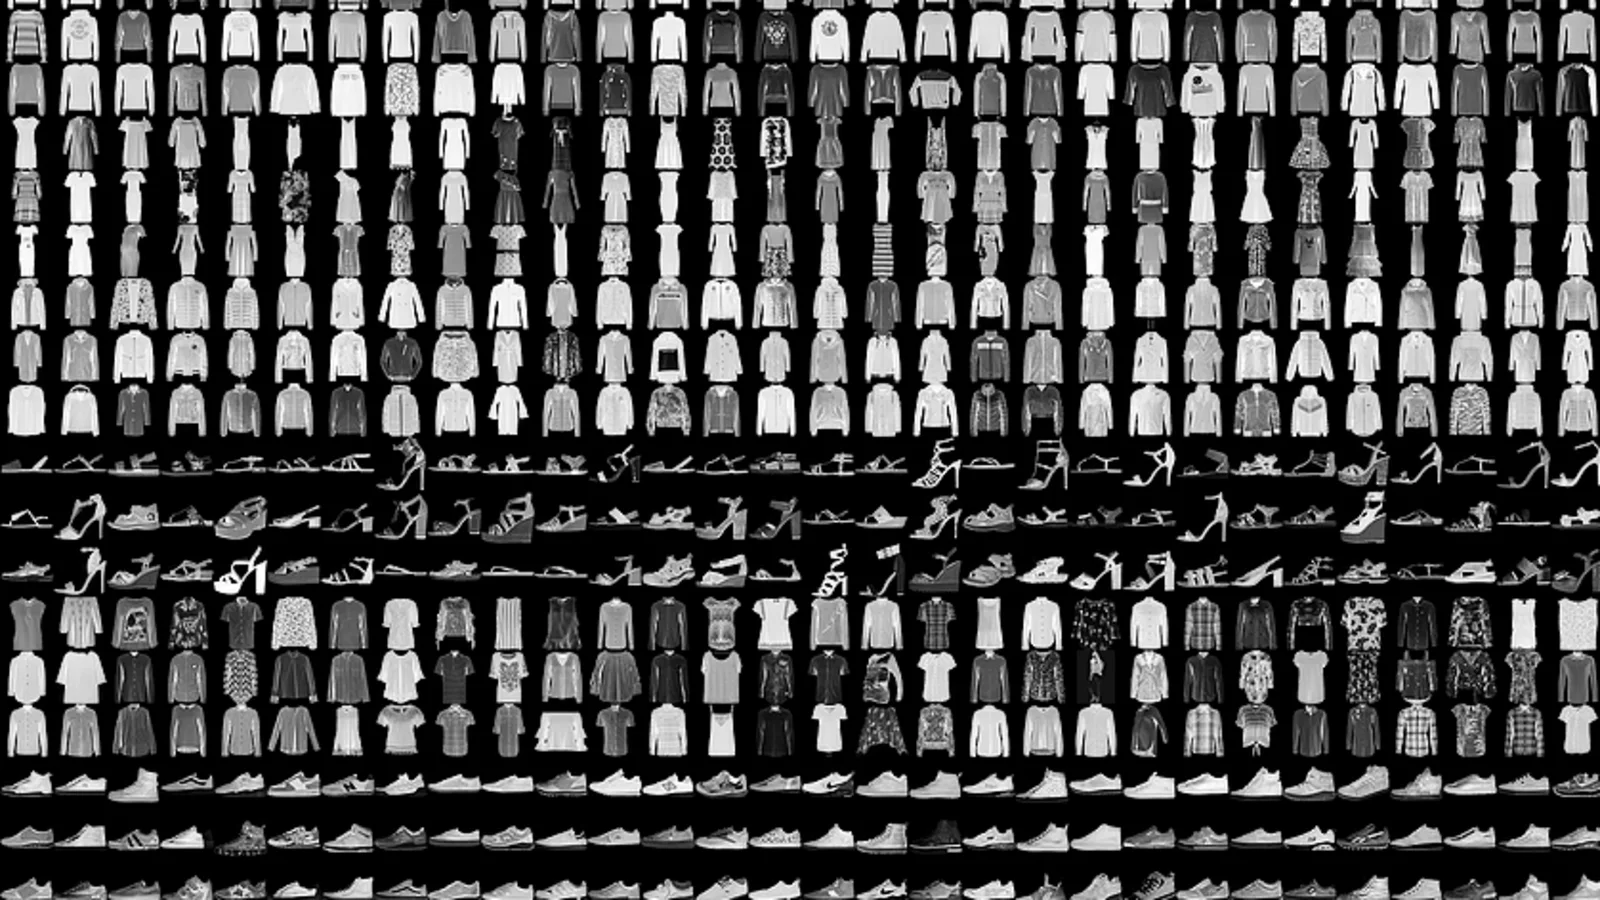

In [2]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

#### import the data

In [3]:
fmnist = pd.read_csv (r'C:\Users\tavor\Downloads\fashion-mnist_train.csv\fashion-mnist_train.csv')

#fashionMnist = pd.read_csv (r'C:\Users\tavor\Downloads\fashion-mnist_train.csv\fashion-mnist_train.csv')

In [4]:
fmnist

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fmnist.shape

(60000, 785)

In [13]:
fmnist["label"].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

The data is balanced.

we have equals number of rows for each label

#### Show some pictures from the data

In [8]:
class_table = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
def get_label_cls(label):
    """given an int label range [0,9], return the string description of that label"""
    return class_table[label]

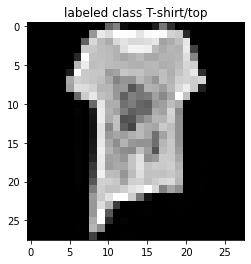

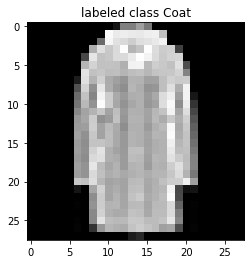

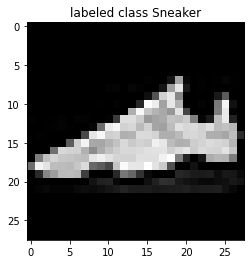

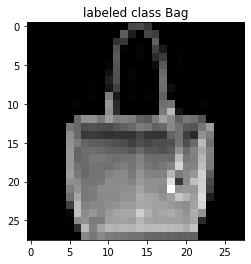

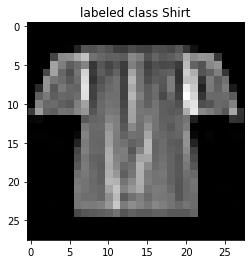

In [107]:
for i in range(5000,5005):     
    sample = np.reshape(fmnist[fmnist.columns[1:]].iloc[i].values/255, (28,28))
    plt.figure()
    plt.title("labeled class {}".format(get_label_cls(fmnist["label"].iloc[i])))
    plt.imshow(sample, 'gray')

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
 
import warnings
warnings.filterwarnings('ignore')

In [43]:
x = fmnist.drop(["label"], axis = 1)
y = fmnist["label"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 784)
(18000, 784)
(42000,)
(18000,)


#### MinMaxScaler

In [7]:
scaler = MinMaxScaler()
X_train_scal = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_test_scal = pd.DataFrame(scaler.fit_transform(X_test), columns= X_test.columns)

#### PCA

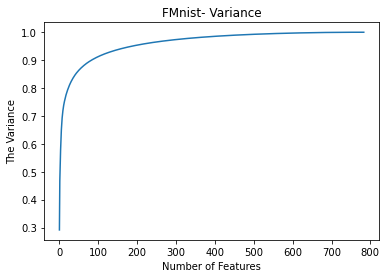

In [8]:
pca = PCA().fit(X_train_scal)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Features")
plt.ylabel("The Variance")
plt.title("FMnist- Variance")
plt.show()

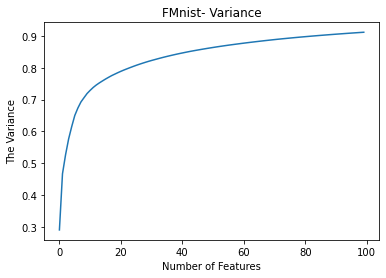

In [102]:
pca = PCA(n_components=100).fit(X_train_scal)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Features")
plt.ylabel("The Variance")
plt.title("FMnist- Variance")
plt.show()

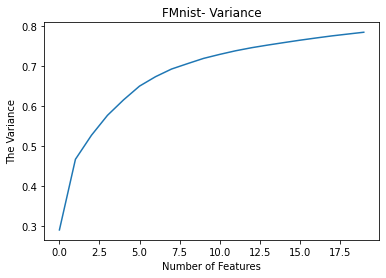

In [9]:
pca = PCA(n_components=20).fit(X_train_scal)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Features")
plt.ylabel("The Variance")
plt.title("FMnist- Variance")
plt.show()

as we can see 10 fitures is about to give us over that 70% succsess so I'll take this number of fitures

In [11]:
pca_end = PCA(n_components=10)
x_train_end = pca_end.fit_transform(X_train_scal)
x_test_end = pca_end.transform(X_test_scal)

In [12]:
print(x_train_end.shape)
print(x_test_end.shape)

(42000, 10)
(18000, 10)


### KNN

The Accuracy score for 10 nearest neighbers is: 82.1%


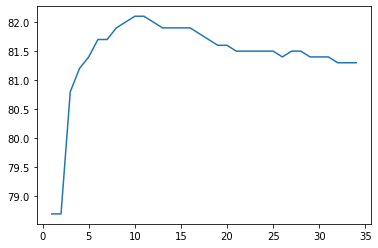

In [13]:
accuracy = []
for i in range (1,35):
    model_knn_ = KNeighborsClassifier(n_neighbors = i)
    model_knn_fit_ = model_knn_.fit(x_train_end, y_train)
    model_knn_pred_ = model_knn_.predict(x_test_end)
    acc_knn = accuracy_score(y_test, model_knn_pred_)
    accuracy.append(round(acc_knn,3)*100)
index = accuracy.index(max(accuracy))+1

print("The Accuracy score for " + str(index) +" nearest neighbers is: " + str(max(accuracy)) +"%")
plt.plot(range(1,35),accuracy)
plt.show()

In [14]:
model_knn = KNeighborsClassifier(n_neighbors= 10)
model_knn_fit = model_knn.fit(x_train_end,y_train)
model_knn_pred = model_knn.predict(x_test_end)

acc_knn = accuracy_score(y_test,model_knn_pred)
print("The Accuracy score for KNN Model is: " + str(round(acc_knn,3)*100) +"%")
print(classification_report(y_test, model_knn_pred))

The Accuracy score for KNN Model is: 82.1%
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1868
           1       0.98      0.95      0.97      1862
           2       0.68      0.68      0.68      1777
           3       0.84      0.86      0.85      1826
           4       0.68      0.69      0.68      1723
           5       0.93      0.88      0.90      1750
           6       0.60      0.54      0.57      1796
           7       0.88      0.90      0.89      1812
           8       0.95      0.95      0.95      1790
           9       0.89      0.92      0.91      1796

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



### Logistic Regression

In [74]:
model_lr = LogisticRegression()
model_lr_fit = model_lr.fit(x_train_end,y_train)
model_lr_pred = model_lr.predict(x_test_end)

acc_lr = accuracy_score(y_test,model_lr_pred)
print("The Accuracy score for Logistic Regression Model is: " + str(round(acc_lr,3)*100) +"%")
print(classification_report(y_test, model_lr_pred))

The Accuracy score for Logistic Regression Model is: 76.7%
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1807
           1       0.95      0.93      0.94      1758
           2       0.57      0.58      0.58      1818
           3       0.78      0.85      0.81      1844
           4       0.61      0.58      0.60      1827
           5       0.85      0.86      0.86      1776
           6       0.48      0.41      0.44      1761
           7       0.85      0.83      0.84      1797
           8       0.91      0.93      0.92      1774
           9       0.88      0.90      0.89      1838

    accuracy                           0.77     18000
   macro avg       0.76      0.77      0.76     18000
weighted avg       0.76      0.77      0.76     18000



### XGBoost

In [75]:
model_xgb = XGBClassifier(n_estimators= 400,eval_metric= 'logloss')
model_xgb_fit = model_xgb.fit(x_train_end,y_train)
model_xgb_pred = model_xgb.predict(x_test_end)

acc_xgb = accuracy_score(y_test,model_xgb_pred)
print("The Accuracy score for XGBoost Model is: " + str(round(acc_xgb,3)*100) +"%")
print(classification_report(y_test, model_xgb_pred))

The Accuracy score for XGBoost Model is: 82.89999999999999%
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1807
           1       0.98      0.96      0.97      1758
           2       0.71      0.70      0.71      1818
           3       0.84      0.86      0.85      1844
           4       0.70      0.72      0.71      1827
           5       0.92      0.91      0.91      1776
           6       0.58      0.56      0.57      1761
           7       0.90      0.90      0.90      1797
           8       0.95      0.95      0.95      1774
           9       0.92      0.93      0.92      1838

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



### AdaBoost

In [90]:
model_ada = AdaBoostClassifier(n_estimators= 450)
model_ada_fit_ = model_ada.fit(x_train_end,y_train)
model_ada_pred_ = model_ada.predict(x_test_end)

acc_ada_ = accuracy_score(y_test,model_ada_pred_)
print("The Accuracy score for AdaBoost Model is: " + str(round(acc_ada_,3)*100) +"%")
print(classification_report(y_test, model_ada_pred_))

The Accuracy score for AdaBoost Model is: 51.800000000000004%
              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1807
           1       0.40      0.67      0.50      1758
           2       0.38      0.10      0.16      1818
           3       0.44      0.81      0.57      1844
           4       0.53      0.35      0.42      1827
           5       0.74      0.19      0.30      1776
           6       0.30      0.35      0.32      1761
           7       0.52      0.94      0.67      1797
           8       0.84      0.69      0.76      1774
           9       0.77      0.69      0.73      1838

    accuracy                           0.52     18000
   macro avg       0.56      0.52      0.49     18000
weighted avg       0.56      0.52      0.49     18000



AdaBoost Model give us a low accuracy

In [80]:
estimators = [('KNN', model_knn),('LR', model_lr),('XGB',model_xgb)]

### Voting

In [81]:
model_vote = VotingClassifier(estimators= estimators)
model_vote_fit = model_vote.fit(x_train_end,y_train)
model_vote_pred = model_vote.predict(x_test_end)

acc_vote = accuracy_score(y_test,model_vote_pred)
print("The Accuracy score for Voting Model is: " + str(round(acc_vote,3)*100) +"%")
print(classification_report(y_test, model_vote_pred))

The Accuracy score for Voting Model is: 82.8%
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1807
           1       0.97      0.96      0.96      1758
           2       0.68      0.71      0.70      1818
           3       0.83      0.88      0.85      1844
           4       0.72      0.69      0.70      1827
           5       0.92      0.90      0.91      1776
           6       0.62      0.53      0.58      1761
           7       0.90      0.90      0.90      1797
           8       0.95      0.94      0.95      1774
           9       0.91      0.94      0.92      1838

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



In [82]:
model_vote = VotingClassifier(estimators= estimators, voting= 'soft')
model_vote_fit = model_vote.fit(x_train_end,y_train)
model_vote_pred = model_vote.predict(x_test_end)

acc_vote = accuracy_score(y_test,model_vote_pred)
print("The Accuracy score for Voting Model is: " + str(round(acc_vote,3)*100) +"%")
print(classification_report(y_test, model_vote_pred))

The Accuracy score for Voting Model is: 83.2%
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1807
           1       0.98      0.96      0.97      1758
           2       0.72      0.69      0.70      1818
           3       0.83      0.88      0.86      1844
           4       0.71      0.72      0.71      1827
           5       0.92      0.90      0.91      1776
           6       0.60      0.57      0.58      1761
           7       0.90      0.90      0.90      1797
           8       0.94      0.95      0.95      1774
           9       0.91      0.94      0.92      1838

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



### Stacking

In [83]:
model_stck = StackingClassifier(estimators= estimators)
model_stck_fit = model_stck.fit(x_train_end,y_train)
model_stck_pred = model_stck.predict(x_test_end)

acc_stck = accuracy_score(y_test,model_stck_pred)
print(classification_report(y_test, model_stck_pred))
print("The Accuracy score for Stacking Model is: " + str(round(acc_stck,3)*100) +"%")

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1807
           1       0.98      0.96      0.97      1758
           2       0.72      0.71      0.71      1818
           3       0.84      0.88      0.86      1844
           4       0.72      0.72      0.72      1827
           5       0.92      0.91      0.91      1776
           6       0.59      0.57      0.58      1761
           7       0.90      0.90      0.90      1797
           8       0.95      0.95      0.95      1774
           9       0.91      0.94      0.92      1838

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000

The Accuracy score for Stacking Model is: 83.39999999999999%


### Bagging

In [84]:
bagging = BaggingClassifier(base_estimator= model_xgb)
bagging_fit = bagging.fit(x_train_end,y_train)
bagging_pred = bagging.predict(x_test_end)

acc_bagging = accuracy_score(y_test,bagging_pred)

print(classification_report(y_test, bagging_pred))
print("The Accuracy score for Bagging Model is: " + str(round(acc_bagging,3)*100) +"%")

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1807
           1       0.98      0.96      0.97      1758
           2       0.71      0.70      0.71      1818
           3       0.84      0.86      0.85      1844
           4       0.71      0.73      0.72      1827
           5       0.92      0.91      0.91      1776
           6       0.59      0.56      0.58      1761
           7       0.91      0.90      0.91      1797
           8       0.94      0.94      0.94      1774
           9       0.91      0.94      0.92      1838

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000

The Accuracy score for Bagging Model is: 83.1%


In [87]:
bagging = BaggingClassifier(base_estimator= model_knn)
bagging_fit = bagging.fit(x_train_end,y_train)
bagging_pred = bagging.predict(x_test_end)

acc_bagging = accuracy_score(y_test,bagging_pred)

print(classification_report(y_test, bagging_pred))
print("The Accuracy score for Bagging Model is: " + str(round(acc_bagging,3)*100) +"%")

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1807
           1       0.98      0.95      0.96      1758
           2       0.71      0.67      0.69      1818
           3       0.83      0.87      0.85      1844
           4       0.69      0.69      0.69      1827
           5       0.93      0.87      0.90      1776
           6       0.57      0.56      0.56      1761
           7       0.88      0.89      0.89      1797
           8       0.94      0.95      0.95      1774
           9       0.89      0.94      0.91      1838

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000

The Accuracy score for Bagging Model is: 82.0%


### Gradient Boosting

In [85]:
grad = GradientBoostingClassifier()
grad_fit = grad.fit(x_train_end,y_train)
grad_pred = grad.predict(x_test_end)

acc_grad = accuracy_score(y_test,grad_pred)

print(classification_report(y_test, grad_pred))
print("The Accuracy score for GradientBoosting Model is: " + str(round(acc_grad,3)*100) +"%")

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1807
           1       0.96      0.95      0.96      1758
           2       0.66      0.65      0.66      1818
           3       0.79      0.86      0.83      1844
           4       0.67      0.68      0.67      1827
           5       0.88      0.88      0.88      1776
           6       0.56      0.50      0.53      1761
           7       0.88      0.86      0.87      1797
           8       0.93      0.93      0.93      1774
           9       0.89      0.92      0.91      1838

    accuracy                           0.80     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.80      0.80      0.80     18000

The Accuracy score for GradientBoosting Model is: 80.30000000000001%


In [15]:
end = {'KNN':['82.1 %'],
       'Logistick Regression':['76.7 %'],
       'XGBoost':['82.8 %'],
       'AdaBoost':['51.8 %'],
       'Voting':['83.2 %'],
       'Stacking':['83.3 %'],
       'Bagging':['83.1 %'],
       'GradientBoosting':['80.3 %']}

dataF = pd.DataFrame(data= end, 
                     columns= ['KNN','Logistick Regression', 'XGBoost','AdaBoost','Voting','Stacking','Bagging','GradientBoosting'],
                     index= ['Accuracy'])
dataF

,KNN,Logistick Regression,XGBoost,AdaBoost,Voting,Stacking,Bagging,GradientBoosting
Accuracy,82.1 %,76.7 %,82.8 %,51.8 %,83.2 %,83.3 %,83.1 %,80.3 %


### as we can see STACKING is the best Model for Fashion Mnist classification

In [19]:
fmnist_test = pd.read_csv(r'C:\Users\tavor\Downloads\fashion-mnist_test.csv\fashion-mnist_test.csv')
fmnist_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
a_test = fmnist_test.drop(['label'], axis =1)
b_test = fmnist_test['label']

a_test = pd.DataFrame(scaler.fit_transform(a_test), columns= a_test.columns)
a_test_end = pca_end.transform(a_test)

In [29]:
print(x_train_end.shape)
print(a_test_end.shape)

(42000, 10)
(10000, 10)


## The Model

In [35]:
estimators = [('KNN', model_knn),('LR', model_lr),('XGB',model_xgb)]

### Stacking

In [41]:
model_stck = StackingClassifier(estimators= estimators)
model_stck_fit = model_stck.fit(x_train_end,y_train)
model_stck_pred = model_stck.predict(a_test_end)

acc_stck = accuracy_score(b_test,model_stck_pred)
print(classification_report(b_test, model_stck_pred))
print("The Accuracy score for Stacking Model is: " + str(round(acc_stck,3)*100) +"%")

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.70      0.71      1000
           3       0.86      0.87      0.86      1000
           4       0.73      0.74      0.74      1000
           5       0.92      0.88      0.90      1000
           6       0.60      0.59      0.60      1000
           7       0.88      0.89      0.88      1000
           8       0.95      0.95      0.95      1000
           9       0.89      0.92      0.91      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

The Accuracy score for Stacking Model is: 83.0%


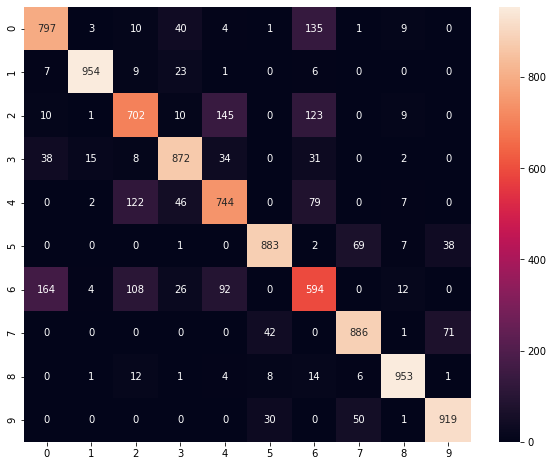

In [46]:
confmat_stck = confusion_matrix(b_test, model_stck_pred)
conf_matrix_stck = pd.DataFrame(data=confmat_stck)
plt.figure(figsize = (10,8))
sns.heatmap(pd.DataFrame(conf_matrix_stck), annot = True, fmt = "g")

## The result: Stacking Model predict 83% with 10 fitures !! 